In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [140]:
from sklearn.model_selection import train_test_split,cross_val_score   # Used for splitting arrays or matrices into train and test subsets.
from sklearn.neighbors import KNeighborsClassifier     # Used for implementing the k-nearest neighbors value. 
from sklearn.metrics import confusion_matrix,accuracy_score         # Used for evaluate the accuracy of a model.
from sklearn.metrics import classification_report      # Used for building a text report.

In [141]:
df = pd.read_csv("./IMDB_Dataset.csv")
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"43,60,000"


In [142]:
# Basic information about the dataset
df.info()

# Summary of numerical columns
df.describe()

# Check data types of each column
df.dtypes

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   650 non-null    object 
 1   Released_Year  650 non-null    int64  
 2   Certificate    580 non-null    object 
 3   Runtime        650 non-null    object 
 4   Genre          650 non-null    object 
 5   IMDB_Rating    650 non-null    float64
 6   Overview       650 non-null    object 
 7   Meta_score     516 non-null    float64
 8   Director       650 non-null    object 
 9   Star           650 non-null    object 
 10  No_of_Votes    650 non-null    int64  
 11  Gross          534 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 61.1+ KB
Dataset contains 650 rows and 12 columns.


In [143]:
df['Gross'] = df['Gross'].str.replace(',', '')
print(df['Gross'].head(1))

df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)

0    28341469
Name: Gross, dtype: object


               Missing Values  Percentage
Series_Title                0    0.000000
Released_Year               0    0.000000
Certificate                70   10.769231
Runtime                     0    0.000000
Genre                       0    0.000000
IMDB_Rating                 0    0.000000
Overview                    0    0.000000
Meta_score                134   20.615385
Director                    0    0.000000
Star                        0    0.000000
No_of_Votes                 0    0.000000
Gross                       0    0.000000


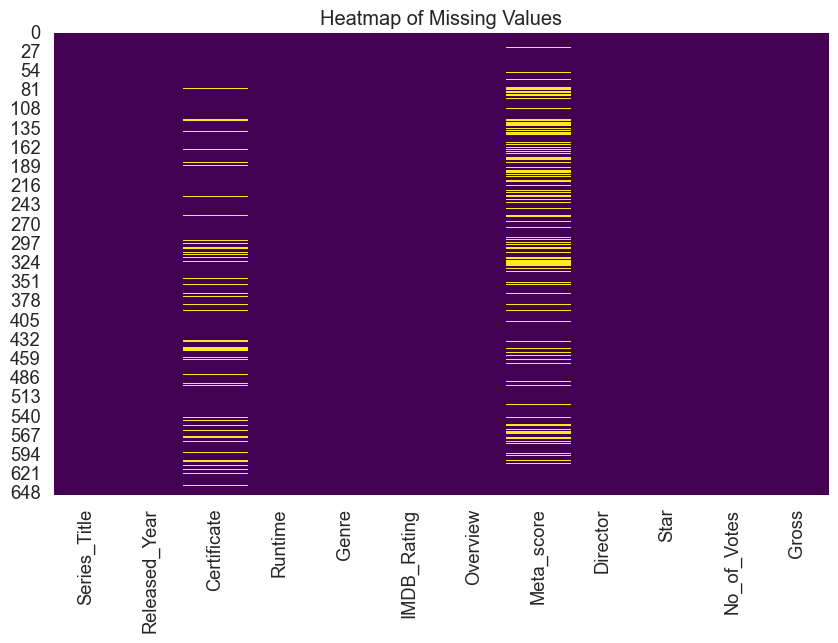

In [144]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [145]:
# Check for infinite values in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    inf_count = df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values.")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [146]:
# Fill missing values for numerical columns with the mean (example)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [147]:
#Replace missing values in categorical columns.
df['Certificate'] = df['Certificate'].fillna('Unknown')

               Missing Values  Percentage
Series_Title                0         0.0
Released_Year               0         0.0
Certificate                 0         0.0
Runtime                     0         0.0
Genre                       0         0.0
IMDB_Rating                 0         0.0
Overview                    0         0.0
Meta_score                  0         0.0
Director                    0         0.0
Star                        0         0.0
No_of_Votes                 0         0.0
Gross                       0         0.0


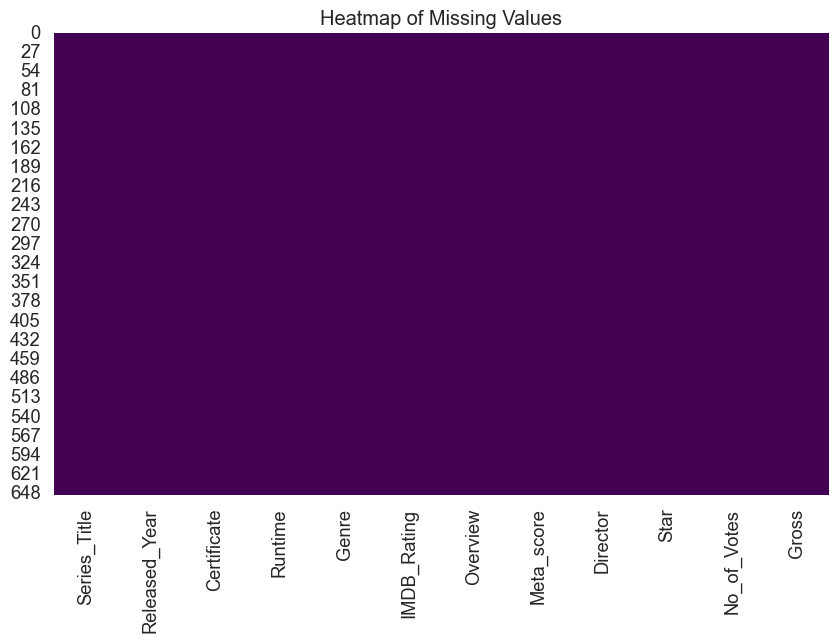

In [148]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [149]:
# Check and count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [150]:
df.drop(columns=['Series_Title'], inplace=True)
df.drop(columns=['Overview'], inplace=True)
df.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


In [151]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  650 non-null    int64  
 1   Certificate    650 non-null    object 
 2   Runtime        650 non-null    object 
 3   Genre          650 non-null    object 
 4   IMDB_Rating    650 non-null    float64
 5   Meta_score     650 non-null    float64
 6   Director       650 non-null    object 
 7   Star           650 non-null    object 
 8   No_of_Votes    650 non-null    int64  
 9   Gross          650 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 50.9+ KB


Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star              object
No_of_Votes        int64
Gross            float64
dtype: object

In [152]:
# Converting 'Runtime' column (e.g., '142 min') to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   Released_Year  Certificate  Runtime  Genre  IMDB_Rating  Meta_score  \
0           1994            1      142    117          9.3        80.0   
1           1972            1      175    103          9.2       100.0   
2           2008           13      152     17          9.0        84.0   
3           1974            1      202    103          9.0        90.0   
4           1957           12       96    103          9.0        96.0   

   Director  Star  No_of_Votes        Gross  
0        97   412      2343110   28341469.0  
1        95   291      1620367  134966411.0  
2        54    90      2303232  534858444.0  
3        95     7      1129952   57300000.0  
4       318   183       689845    4360000.0  

Data Types after Encoding:
Released_Year      int64
Certificate        int32
Runtime            int32
Genre              int32
IMDB_Rating      float64
Meta_score       float64
Director           int32
Star               int32
No_of_Votes        int64

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x1200 with 0 Axes>

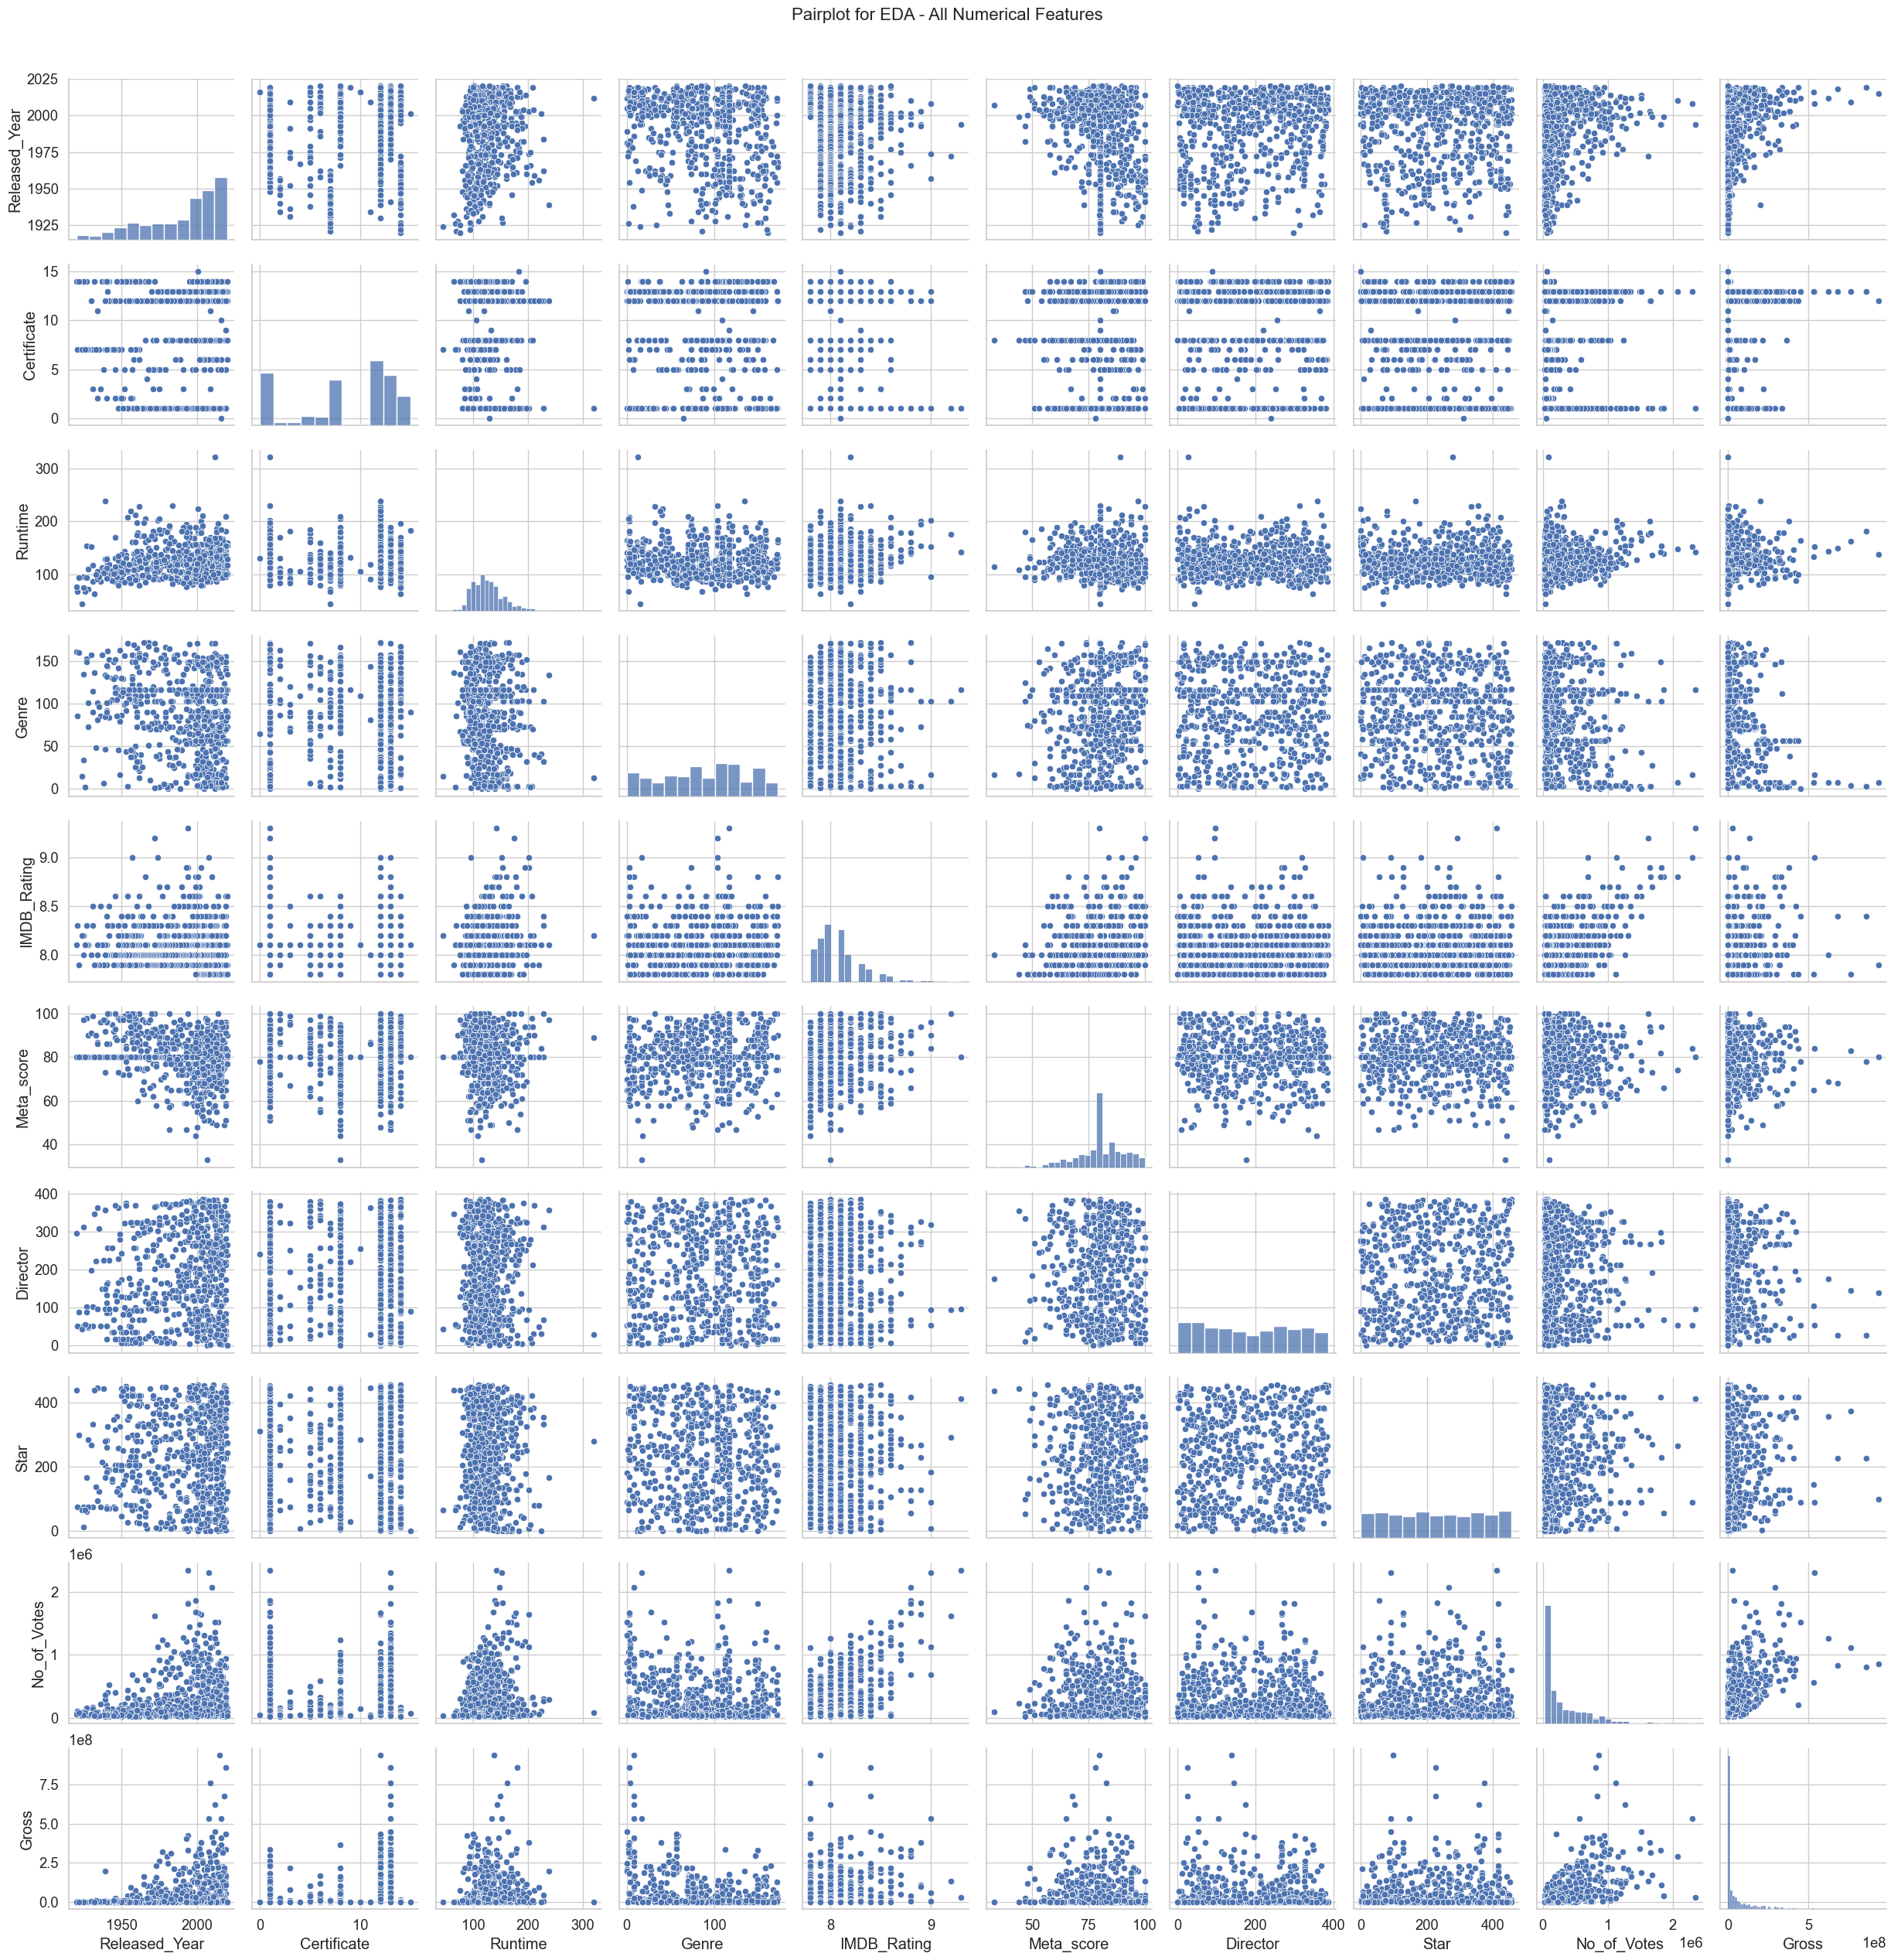

In [153]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(df, height=2.5, diag_kind='hist', corner=False) 
plt.suptitle("Pairplot for EDA - All Numerical Features", y=1.02, fontsize=16)
plt.show()

In [154]:
# Check unique class counts for each column
print("Class distribution for Certificate:")
print(df['Certificate'].value_counts())

print("\nClass distribution for Genre:")
print(df['Genre'].value_counts())

print("\nClass distribution for IMDB_Rating (binned):")
df['Rating_Category'] = pd.cut(df['IMDB_Rating'], bins=[0, 7.9, 8.2, 10], labels=['Low', 'Medium', 'High'])
print(df['Rating_Category'].value_counts())

Class distribution for Certificate:
Certificate
12    155
1     127
13    123
8      84
14     70
7      26
5      22
6      21
2       8
3       7
11      2
9       1
0       1
10      1
15      1
4       1
Name: count, dtype: int64

Class distribution for Genre:
Genre
117    57
149    25
103    21
73     20
85     20
       ..
60      1
83      1
82      1
41      1
42      1
Name: count, Length: 173, dtype: int64

Class distribution for IMDB_Rating (binned):
Rating_Category
Medium    335
Low       187
High      128
Name: count, dtype: int64


In [186]:
def knn_pipeline(X, y, scale_features=True, test_size=0.4, random_state=42, max_k=20):
    # Step 1: Feature Scaling (if enabled)
    if scale_features:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        print("Features have been scaled using StandardScaler.\n")
    else:
        print("Features are used without scaling.\n")

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    print("Data split into training and test sets.\n")

    # Step 3: KNN Classifier with k=5 (default)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Step 4: Evaluation Metrics
    print("KNN Evaluation Metrics (k=5):")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(pd.DataFrame(cm, index=[f"Actual {cls}" for cls in knn.classes_],
                       columns=[f"Predicted {cls}" for cls in knn.classes_]))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 5: Error Analysis for Different K Values
    error_rates = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_k_pred = knn.predict(X_test)
        error_rates.append(np.mean(y_k_pred != y_test))

    # Step 6: Plot Error Rate vs K Value
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), error_rates, color='blue', linestyle='dashed', 
             marker='o', markerfacecolor='red', markersize=8)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.grid()
    plt.show()

    # Final KNN model with best K (minimum error)
    best_k = error_rates.index(min(error_rates)) + 1
    print(f"Best K value based on minimum error rate: {best_k}\n")

    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)
    final_accuracy = knn_best.score(X_test, y_test)
    print(f"Final KNN Accuracy with K={best_k}: {final_accuracy:.4f}")


Features are used without scaling.

Data split into training and test sets.

KNN Evaluation Metrics (k=5):
Accuracy: 0.4154

Confusion Matrix:
               Predicted High  Predicted Low  Predicted Medium
Actual High                11             12                28
Actual Low                 17             20                38
Actual Medium              20             37                77

Classification Report:
              precision    recall  f1-score   support

        High       0.23      0.22      0.22        51
         Low       0.29      0.27      0.28        75
      Medium       0.54      0.57      0.56       134

    accuracy                           0.42       260
   macro avg       0.35      0.35      0.35       260
weighted avg       0.41      0.42      0.41       260



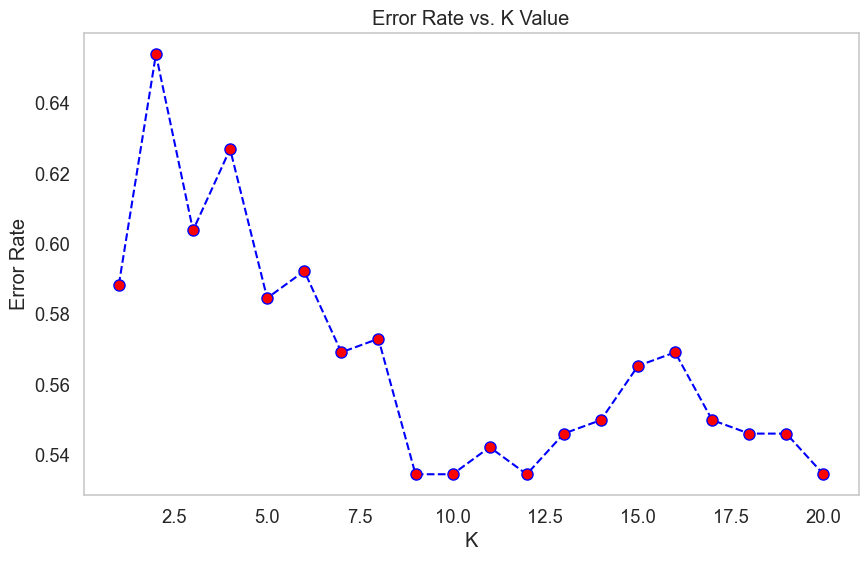

Best K value based on minimum error rate: 9

Final KNN Accuracy with K=9: 0.4654


In [187]:
X = df.drop(columns=['Rating_Category'])  # Features
y = df['Rating_Category']  # Target

# Run the pipeline
knn_pipeline(X, y, scale_features=False, test_size=0.4, random_state=42, max_k=20)

Features have been scaled using StandardScaler.

Data split into training and test sets.

KNN Evaluation Metrics (k=5):
Accuracy: 0.6692

Confusion Matrix:
               Predicted High  Predicted Low  Predicted Medium
Actual High                21              1                29
Actual Low                  0             54                21
Actual Medium               3             32                99

Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.41      0.56        51
         Low       0.62      0.72      0.67        75
      Medium       0.66      0.74      0.70       134

    accuracy                           0.67       260
   macro avg       0.72      0.62      0.64       260
weighted avg       0.69      0.67      0.66       260



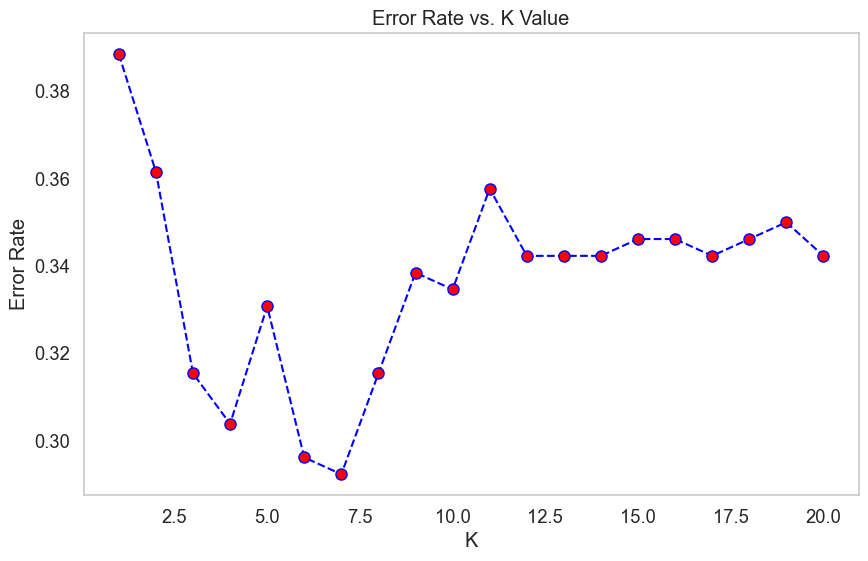

Best K value based on minimum error rate: 7

Final KNN Accuracy with K=7: 0.7077


In [188]:
knn_pipeline(X, y, scale_features=True, test_size=0.4, random_state=42, max_k=20)

1. Model Performance Overview:

    The final accuracy of the model after tuning the hyperparameter KK is 70.77% with K=7K=7, which is an improvement compared to the initial K=5K=5 (Accuracy = 66.92%).
    The accuracy improvement highlights that tuning the value of KK has a significant impact on the performance of the KNN model.

2. Precision:

    The High class has the highest precision of 0.88, meaning when the model predicts "High," it is correct 88% of the time.
    The Low and Medium classes have moderate precision at 0.62 and 0.66, respectively.

3. Recall:

    The Low class has the highest recall of 0.72, meaning the model correctly identifies 72% of all actual "Low" instances.
    The Medium class also has good recall at 0.74.
    The High class has a poor recall of 0.41, indicating many "High" instances are being misclassified.

4. F1-Score:

    The Medium class achieves the best balance between precision and recall with an F1-score of 0.70.
    The High class has a relatively low F1-score (0.56) due to its low recall.

5. High Class:
        21 instances are correctly classified as High," but 29 instances are misclassified as "Medium," which is a significant number.
6. Low Class:
        The model performs best for the "Low" class, correctly predicting 54 out of 75 instances.
        Only 21 instances are misclassified as "Medium," with none misclassified as "High."
7. Medium Class:
        99 out of 134 instances are correctly classified.
        Misclassifications occur mainly in the "Low" class (32 instances).

Conclusion: The model struggles to distinguish between "High" and "Medium" categories, which causes the most misclassifications.